In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and direc

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 한글깨짐 방지
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 데이터 불러오기
df = pd.read_csv('/content/shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
# 데이터 기본정보 확인, null값 없음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
# 데이터 기본정보 확인
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


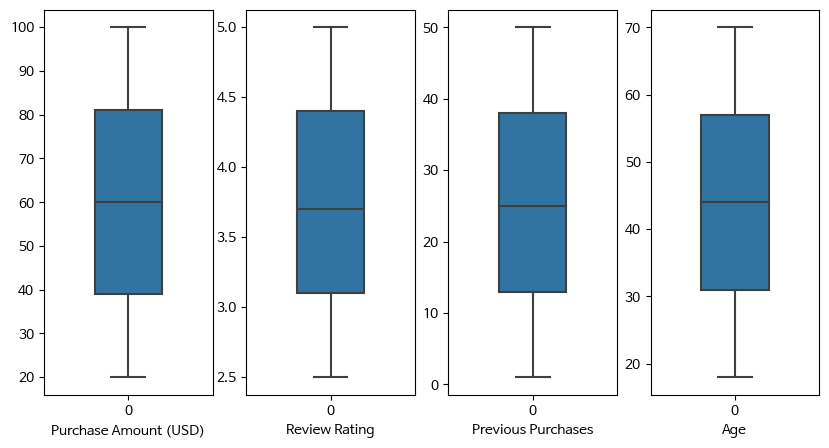

In [ ]:
# 수치형 컬럼의 이상치 확인하기

f, ax = plt.subplots(1, 4, figsize = (10, 5))

sns.boxplot(df['Purchase Amount (USD)'], ax=ax[0], width=0.4)
ax[0].set_xlabel('Purchase Amount (USD)')

sns.boxplot(df['Review Rating'], ax=ax[1], width=0.4)
ax[1].set_xlabel('Review Rating')

sns.boxplot(df['Previous Purchases'], ax=ax[2], width=0.4)
ax[2].set_xlabel('Previous Purchases')

sns.boxplot(df['Age'], ax=ax[3], width=0.4)
ax[3].set_xlabel('Age')

plt.show()

In [ ]:
# 상관관계 분석을 위해 범주형 컬럼 변경하기
# 범주형 컬럼 : Gender, Subscription Status, Discount Applied, Frequency of Purchases

# Gender 컬럼 수치형으로 변경하는 함수

def gender_to_num(gender):
  if gender == 'Male':
    return 0
  else:
    return 1

In [ ]:
# 수치형으로 변경한 Gender 컬럼 생성

df['gender'] = df['Gender'].apply(gender_to_num)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,gender
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,0
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,0


In [ ]:
# Subscription Status 컬럼 수치형으로 변경하는 함수
def subscription_to_num(subscription_status):
  if subscription_status == 'No':
    return 0
  else:
    return 1

In [ ]:
# 수치형으로 변경한 Subscription Status 컬럼 생성
df['subscription_status'] = df['Subscription Status'].apply(subscription_to_num)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,gender,subscription_status
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0,1
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,0,1
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,0,1


In [ ]:
# Discount Applied 컬럼 수치형으로 변경 함수
def discount_to_num(discount_applied):
  if discount_applied == 'No':
    return 0
  else:
    return 1

In [ ]:
# 수치형으로 변경한 Discount Applied 컬럼 생성
df['discount_applied'] = df['Discount Applied'].apply(discount_to_num)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,0,1,1
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Express,Yes,Yes,2,Cash,Fortnightly,0,1,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0,1,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,0,1,1
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,0,1,1


In [ ]:
# Frequency of Purchases 컬럼 수치형으로 변경하는 함수
def frequency_to_num(frequency_of_purchases):
  if frequency_of_purchases == 'Weekly':
    return 5
  elif frequency_of_purchases in ['Fortnightly', 'Bi-Weekly']:
    return 4
  elif frequency_of_purchases == 'Monthly':
    return 3
  elif frequency_of_purchases in ['Every 3 Months', 'Quarterly']:
    return 2
  else:
    return 1

In [ ]:
# 수치형으로 변경한 Frequency of Purchases 컬럼 생성
df['frequency_of_purchases'] = df['Frequency of Purchases'].apply(frequency_to_num)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Express,Yes,Yes,14,Venmo,Fortnightly,0,1,1,4
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Express,Yes,Yes,2,Cash,Fortnightly,0,1,1,4
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0,1,1,5
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,0,1,1,5
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Free Shipping,Yes,Yes,31,PayPal,Annually,0,1,1,1


In [ ]:
# 컬럼별 상관계수 확인
corr=df.corr(method='pearson')
corr

<ipython-input-14-a1697b66744e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr(method='pearson')


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,gender,subscription_status,discount_applied,frequency_of_purchases
Customer ID,1.000000,-0.004079,0.011048,0.001343,-0.039159,0.807960,-0.768960,-0.857496,-0.010594
Age,-0.004079,1.000000,-0.010424,-0.021949,0.040445,-0.002763,0.006492,0.004366,-0.009725
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030776,0.008063,0.014044,-0.006996,-0.017798,-0.012473
Review Rating,0.001343,-0.021949,0.030776,1.000000,0.004229,-0.008164,-0.006368,-0.012486,-0.004025
Previous Purchases,-0.039159,0.040445,0.008063,0.004229,1.000000,-0.035873,0.030859,0.023537,0.005258
gender,0.807960,-0.002763,0.014044,-0.008164,-0.035873,1.000000,-0.417197,-0.595823,0.004067
subscription_status,-0.768960,0.006492,-0.006996,-0.006368,0.030859,-0.417197,1.000000,0.700202,0.011689
discount_applied,-0.857496,0.004366,-0.017798,-0.012486,0.023537,-0.595823,0.700202,1.000000,0.006064
frequency_of_purchases,-0.010594,-0.009725,-0.012473,-0.004025,0.005258,0.004067,0.011689,0.006064,1.000000


In [ ]:
# Customer ID는 상관계수 확인이 필요없는 행이므로 삭제
corr = corr[corr['Customer ID'] != 1]
corr = corr.drop(['Customer ID'], axis=1)
corr

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,gender,subscription_status,discount_applied,frequency_of_purchases
Age,1.000000,-0.010424,-0.021949,0.040445,-0.002763,0.006492,0.004366,-0.009725
Purchase Amount (USD),-0.010424,1.000000,0.030776,0.008063,0.014044,-0.006996,-0.017798,-0.012473
Review Rating,-0.021949,0.030776,1.000000,0.004229,-0.008164,-0.006368,-0.012486,-0.004025
Previous Purchases,0.040445,0.008063,0.004229,1.000000,-0.035873,0.030859,0.023537,0.005258
gender,-0.002763,0.014044,-0.008164,-0.035873,1.000000,-0.417197,-0.595823,0.004067
subscription_status,0.006492,-0.006996,-0.006368,0.030859,-0.417197,1.000000,0.700202,0.011689
discount_applied,0.004366,-0.017798,-0.012486,0.023537,-0.595823,0.700202,1.000000,0.006064
frequency_of_purchases,-0.009725,-0.012473,-0.004025,0.005258,0.004067,0.011689,0.006064,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


([<matplotlib.axis.YTick at 0x7b7919fcbc40>,
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Purchase Amount (USD)'),
  Text(0, 2.5, 'Review Rating'),
  Text(0, 3.5, 'Previous Purchases'),
  Text(0, 4.5, 'gender'),
  Text(0, 5.5, 'subscription_status'),
  Text(0, 6.5, 'discount_applied'),
  Text(0, 7.5, 'frequency_of_purchases')])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


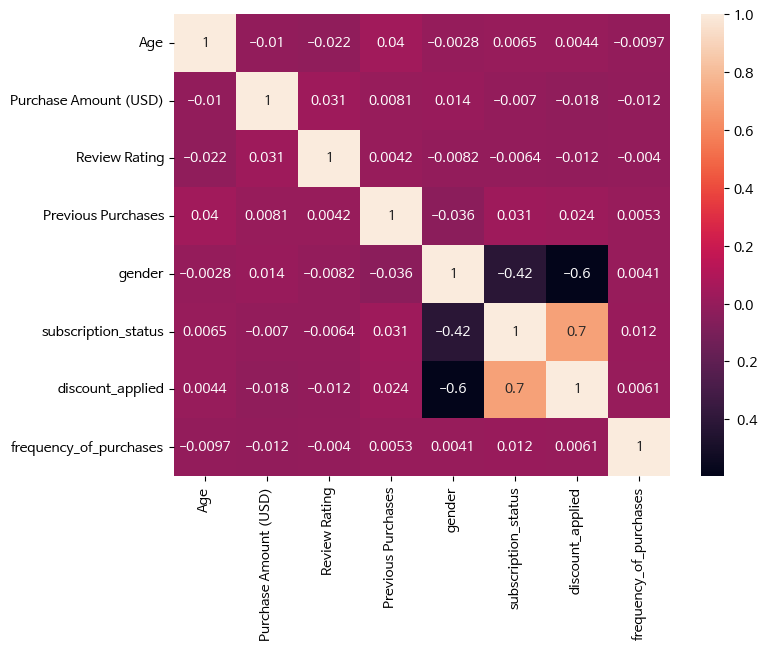

In [ ]:
# 각 컬럼별 상관계수 확인

fig = plt.figure(figsize=(8,6))
fig.set_facecolor('white')

sns.heatmap(corr.values,annot=True)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns, rotation=90)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index, rotation=0)

In [ ]:
# Frequency of Purchases 컬럼을 일년 예상구매 횟수로 바꾸는 함수(예상 구매 횟수)
def times_per_annual(frequency_of_purchases):
  if frequency_of_purchases in ['Bi-Weekly', 'Fortnightly']:
    return 26
  elif frequency_of_purchases in ['Every 3 Months', 'Quarterly']:
    return 4
  elif frequency_of_purchases == 'Weekly':
    return 52
  elif frequency_of_purchases == 'Annually':
    return 1
  elif frequency_of_purchases == 'Monthly':
    return 12

In [ ]:
# 일년 예상구매 횟수 컬럼 생성
df['purchases_times_per_annual'] = df['Frequency of Purchases'].apply(times_per_annual)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases,purchases_times_per_annual
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Yes,14,Venmo,Fortnightly,0,1,1,4,26
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Yes,2,Cash,Fortnightly,0,1,1,4,26
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Yes,23,Credit Card,Weekly,0,1,1,5,52
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,Yes,49,PayPal,Weekly,0,1,1,5,52
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Yes,31,PayPal,Annually,0,1,1,1,1


In [ ]:
# 고객 남녀 성비 확인
df_gender = df.groupby('Gender')['Customer ID'].count().sort_values(ascending=False)/df['Customer ID'].count()*100
df_gender

Gender
Male      68.0
Female    32.0
Name: Customer ID, dtype: float64

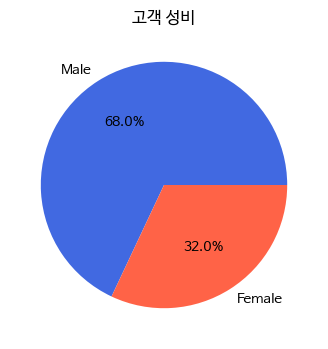

In [ ]:
# 고객 남녀 비율 그래프
plt.figure(figsize=(6,4))
plt.pie(df_gender, labels = df_gender.index, autopct = '%.1f%%', colors=['royalblue', 'tomato'])

plt.title('고객 성비')
plt.show()

In [ ]:
# Age 컬럼을 구간별로 나누는 함수
def age_cat(age):
  return (age//10) * 10

In [ ]:
# Age 컬럼을 구간별로 카테고리화한 컬럼 생성
df['Age2'] = df['Age'].apply(age_cat)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases,purchases_times_per_annual,Age2
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,14,Venmo,Fortnightly,0,1,1,4,26,50
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,2,Cash,Fortnightly,0,1,1,4,26,10
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,23,Credit Card,Weekly,0,1,1,5,52,50
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,49,PayPal,Weekly,0,1,1,5,52,20
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,31,PayPal,Annually,0,1,1,1,1,40


In [ ]:
# 고객 연령대 확인
df_by_age2 = df.groupby('Age2')['Customer ID'].count()
df_by_age2

Age2
10    150
20    728
30    724
40    739
50    771
60    721
70     67
Name: Customer ID, dtype: int64

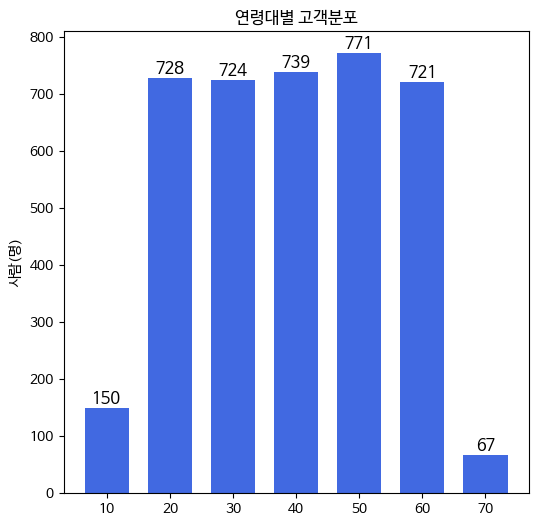

In [ ]:
# 연령대별 고객수 그래프
plt.figure(figsize=(6,6))
bar = plt.bar(df_by_age2.index, df_by_age2, width=7, color='royalblue')

for rect in bar:
    height = rect.get_height()
		#bar의 가장 정 가운데 x 좌표 구하기 : get_x()로 x축의 가장 왼쪽 부분 + get_width의 절반 값
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height , ha='center', va='bottom', size = 12)

plt.title('연령대별 고객분포')
plt.xlabel('')
plt.ylabel('사람(명)')

plt.xticks(rotation=0)
plt.show()

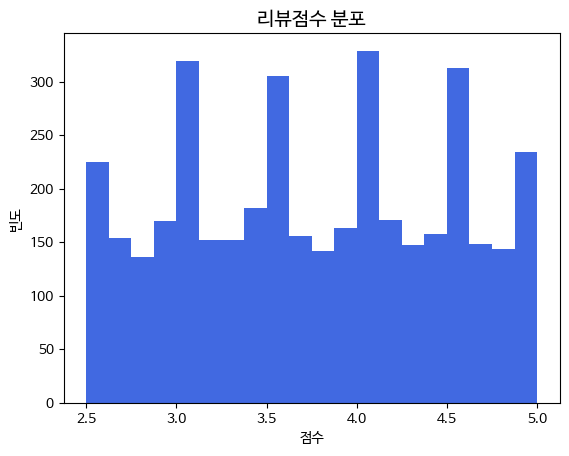

In [ ]:
# Review Rating컬럼 분포 확인하기

data = df['Review Rating']
plt.hist(data, bins=20, color='royalblue')
plt.title('리뷰점수 분포', fontsize=14)
plt.xlabel('점수')
plt.ylabel('빈도')
plt.show()

In [ ]:
# Size별 판매량 확인
df_by_size = df.groupby('Size')['Customer ID'].count().sort_index().loc[['S', 'M', 'L', 'XL']]
df_by_size

Size
S      663
M     1755
L     1053
XL     429
Name: Customer ID, dtype: int64

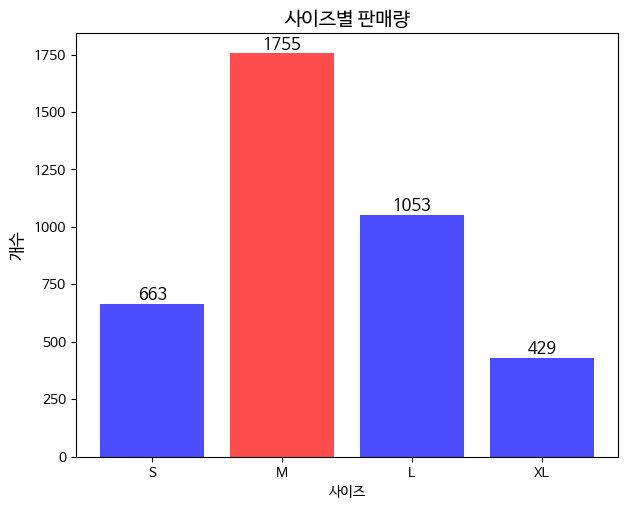

In [ ]:
# Size별 판매량 그래프
plt.figure(figsize=(7,5.5))
color=['blue', 'red','blue', 'blue']
bar = plt.bar(df_by_size.index, df_by_size, color=color, alpha=0.7)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height, ha='center', va='bottom', size = 12)

plt.title('사이즈별 판매량', fontsize=14)
plt.xlabel('사이즈')
plt.ylabel('개수', fontsize=12)
plt.xticks()

plt.show()

In [ ]:
# Location별 판매량 확인
df_by_location = df.groupby('Location')['Customer ID'].count().sort_values(ascending=False)
df_by_location

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nevada            87
Nebraska          87
New York          87
Delaware          86
Maryland          86
Vermont           85
Louisiana         84
North Dakota      83
New Mexico        81
West Virginia     81
Missouri          81
Mississippi       80
Georgia           79
Arkansas          79
Indiana           79
Kentucky          79
North Carolina    78
Connecticut       78
Ohio              77
Tennessee         77
Texas             77
Virginia          77
Maine             77
South Carolina    76
Oklahoma          75
Wisconsin         75
Colorado          75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Massachusetts     72
Alaska            72
New Hampshire     71
Utah              71
Wyoming           71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Arizona           65
Hawa

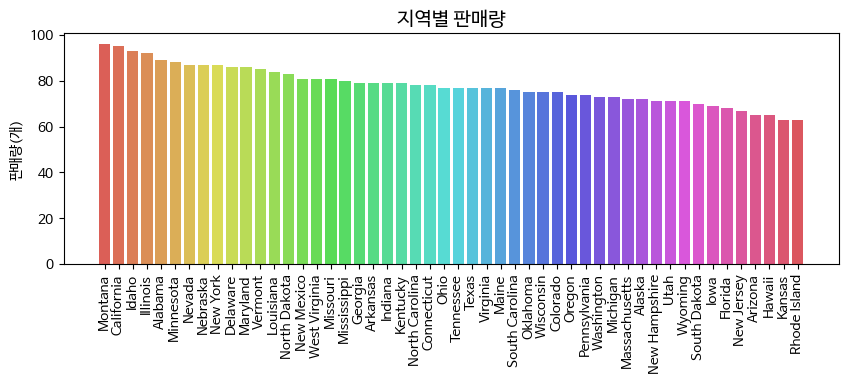

In [ ]:
# Location별 판매량 그래프
plt.figure(figsize=(10,3))
colors = sns.color_palette('hls',len(df_by_location))
plt.bar(df_by_location.index, df_by_location, color=colors)

plt.title('지역별 판매량', fontsize=14)
plt.xlabel('')
plt.ylabel('판매량(개)', fontsize=10)
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Payment Method별 거래수 확인
df_by_payment = df.groupby('Payment Method')['Customer ID'].count().sort_values()
df_by_payment

Payment Method
Bank Transfer    612
Venmo            634
Debit Card       636
Cash             670
Credit Card      671
PayPal           677
Name: Customer ID, dtype: int64

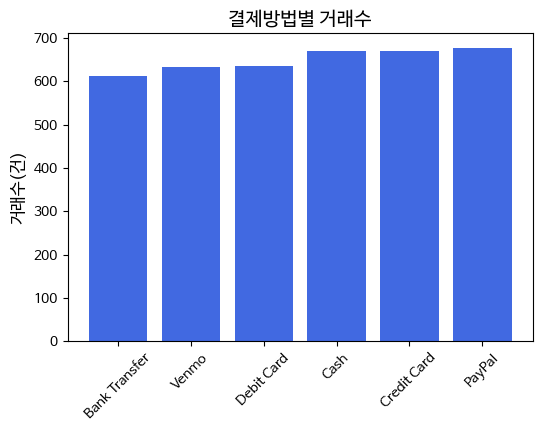

In [ ]:
# Payment Method별 거래수 그래프
plt.figure(figsize=(6,4))
plt.bar(df_by_payment.index, df_by_payment, color='royalblue')

plt.title('결제방법별 거래수', fontsize=14)
plt.xlabel('')
plt.ylabel('거래수(건)', fontsize=12)
plt.xticks(rotation=45)

plt.show()

In [ ]:
# Shipping Type별 거래수 확인
df_by_shipping = df.groupby('Shipping Type')['Customer ID'].count().sort_values()
df_by_shipping

Shipping Type
2-Day Shipping    627
Express           646
Next Day Air      648
Store Pickup      650
Standard          654
Free Shipping     675
Name: Customer ID, dtype: int64

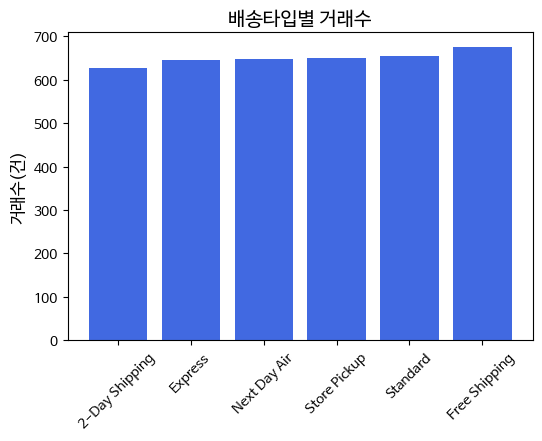

In [ ]:
# Shipping Type별 거래수 그래프
plt.figure(figsize=(6,4))
plt.bar(df_by_shipping.index, df_by_shipping, color='royalblue')

plt.title('배송타입별 거래수', fontsize=14)
plt.xlabel('')
plt.ylabel('거래수(건)', fontsize=12)
plt.xticks(rotation=45)

plt.show()

In [ ]:
# 이제 심층분석 : 보통 매출 증대를 위해 할인 프로모션을 하는 경우가 많으니 할인 프로모션을 생각해보자
# 할인 프로모션을 하는 것이 타당한지 보기 위해 매출액, 구매빈도와 할인적용 컬럼의 상관관계를 보자

# 구매금액(Purchase Amount)컬럼, 할인(Discount Applied)컬럼, 1년동안의 예상 구매 횟수(purchased_times_per_annual)컬럼의 상관계수 확인

corr2 = df[['Purchase Amount (USD)', 'discount_applied', 'purchases_times_per_annual']].corr(method='pearson')
corr2

,Purchase Amount (USD),discount_applied,purchases_times_per_annual
Purchase Amount (USD),1.000000,-0.017798,-0.013138
discount_applied,-0.017798,1.000000,0.004334
purchases_times_per_annual,-0.013138,0.004334,1.000000


([<matplotlib.axis.YTick at 0x7b7918451870>,
 [Text(0, 0.5, 'Purchase Amount (USD)'),
  Text(0, 1.5, 'discount_applied'),
  Text(0, 2.5, 'purchases_times_per_annual')])

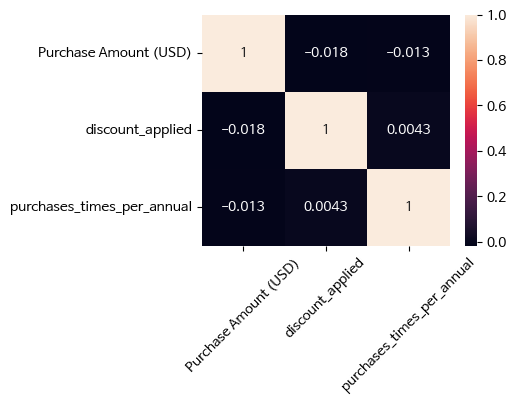

In [ ]:
# 구매금액(Purchase Amount)컬럼, 할인(Discount Applied)컬럼, 1년동안의 예상 구매 횟수(purchased_times_per_annual)컬럼의 상관계수 그래프

fig = plt.figure(figsize=(4,3))
fig.set_facecolor('white')

sns.heatmap(corr2.values,annot=True)
plt.xticks(np.arange(0.5, len(corr2.columns), 1), corr2.columns, rotation=45)
plt.yticks(np.arange(0.5, len(corr2.index), 1), corr2.index, rotation=0)

In [ ]:
# 전체고객을 대상으로 보면 상관관계가 있어보이지 않는다. 심슨의 역설이 생길 수 있으니 Regular고객과 VIP고객으로 클러스터링 한 후 상관관계가 있는지 확인하자
# VIP고객부터 확인
# VIP 정의 : Frequency of Purchases 컬럼을 바탕으로 1년동안의 구매횟수를 추정하여 purchases_times_per_annual컬럼 생성
# purchases_times_per_annual 컬럼에서 1년에 26회 이상 구매한 고객을 VIP, 미만은 Regular 고객이라 지칭


In [ ]:
# VIP-Regular 고객으로 카테고리화 하는 함수

def customer_re_grouping(purchases_times_per_annual):
  if purchases_times_per_annual >= 26:
    return 'VIP'
  else:
    return 'Regular'

In [ ]:
# VIP-Regular 카테고리화 된 컬럼 생성
df['customer_type2'] = df['purchases_times_per_annual'].apply(customer_re_grouping)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Previous Purchases,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases,purchases_times_per_annual,Age2,customer_type2
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,14,Venmo,Fortnightly,0,1,1,4,26,50,VIP
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,2,Cash,Fortnightly,0,1,1,4,26,10,VIP
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,23,Credit Card,Weekly,0,1,1,5,52,50,VIP
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,49,PayPal,Weekly,0,1,1,5,52,20,VIP
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,31,PayPal,Annually,0,1,1,1,1,40,Regular


In [ ]:
# VIP고객의 Purchase Amount, discount_applied, purchases_times_per_annual 컬럼 상관관계 보기

df_by_VIP = df[df['customer_type2'] == 'VIP']
corr3 = df_by_VIP[['Purchase Amount (USD)', 'discount_applied', 'purchases_times_per_annual']].corr(method='pearson')
corr3

,Purchase Amount (USD),discount_applied,purchases_times_per_annual
Purchase Amount (USD),1.000000,-0.016324,-0.018021
discount_applied,-0.016324,1.000000,0.003294
purchases_times_per_annual,-0.018021,0.003294,1.000000


([<matplotlib.axis.YTick at 0x7b791829fa60>,
 [Text(0, 0.5, 'Purchase Amount (USD)'),
  Text(0, 1.5, 'discount_applied'),
  Text(0, 2.5, 'purchases_times_per_annual')])

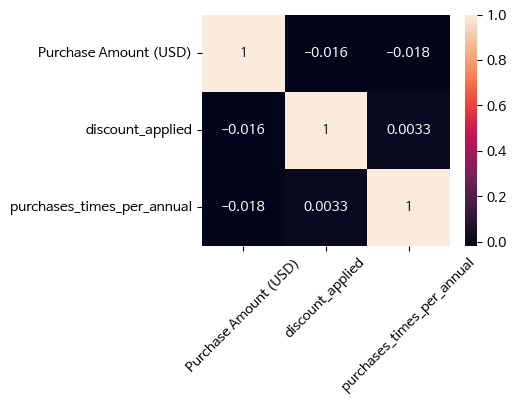

In [ ]:
# VIP고객의 Purchase Amount, discount_applied, purchases_times_per_annual 컬럼 상관계수 그래프

fig = plt.figure(figsize=(4,3))
fig.set_facecolor('white')

sns.heatmap(corr3.values,annot=True)
plt.xticks(np.arange(0.5, len(corr3.columns), 1), corr3.columns, rotation=45)
plt.yticks(np.arange(0.5, len(corr3.index), 1), corr3.index, rotation=0)

In [ ]:
# Regular 고객의 Purchase Amount, discount_applied, purchases_times_per_annual 컬럼 상관관계 보기

df_by_Regualr = df[df['customer_type2'] == 'Regular']
corr4 = df_by_Regualr[['Purchase Amount (USD)', 'discount_applied', 'purchases_times_per_annual']].corr(method='pearson')
corr4

,Purchase Amount (USD),discount_applied,purchases_times_per_annual
Purchase Amount (USD),1.000000,-0.018818,-0.013657
discount_applied,-0.018818,1.000000,0.004628
purchases_times_per_annual,-0.013657,0.004628,1.000000


([<matplotlib.axis.YTick at 0x7b79183bac80>,
 [Text(0, 0.5, 'Purchase Amount (USD)'),
  Text(0, 1.5, 'discount_applied'),
  Text(0, 2.5, 'purchases_times_per_annual')])

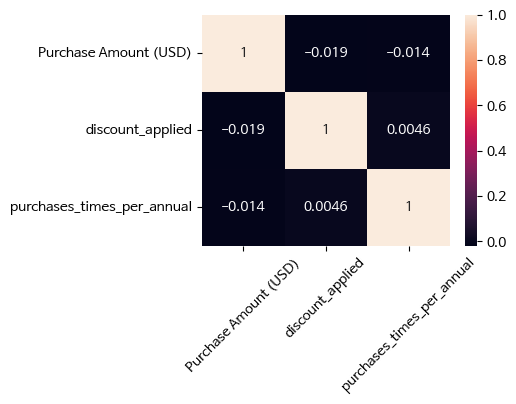

In [ ]:
# Regular 고객의 Purchase Amount, discount_applied, purchases_times_per_annual 컬럼 상관계수 그래프

fig = plt.figure(figsize=(4,3))
fig.set_facecolor('white')

sns.heatmap(corr4.values,annot=True)
plt.xticks(np.arange(0.5, len(corr4.columns), 1), corr4.columns, rotation=45)
plt.yticks(np.arange(0.5, len(corr4.index), 1), corr4.index, rotation=0)

In [ ]:
# 클러스터링을 해도 상관관계가 별로 없어보임
# 그러면 VIP와 Regular 고객을 타겟팅해서 프로모션을 할지 전체고객을 대상으로 할지 결정을 해야 하므로
# 평균 구매단가를 전체를 대상으로도 보고 클러스터링 한 다음에도 보자.

In [ ]:
# 전체 고객 평균 구매단가 확인
df['Purchase Amount (USD)'].mean()

59.76435897435898

In [ ]:
# 거래당 결제금액 중앙값 확인
df['Purchase Amount (USD)'].median()

60.0

In [ ]:
# VIP-Regular고객 그룹핑한 후 평균단가 확인

df_by_type2_USD = df.groupby('customer_type2')['Purchase Amount (USD)'].mean()
df_by_type2_USD

customer_type2
Regular    59.897887
VIP        59.578010
Name: Purchase Amount (USD), dtype: float64

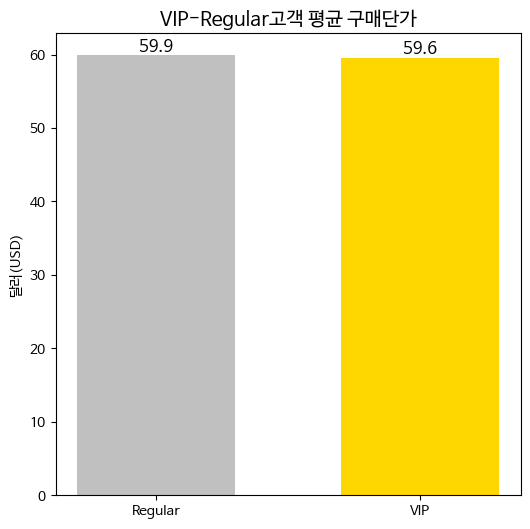

In [ ]:
# VIP-Regular고객 평균단가 그래프

plt.figure(figsize=(6,6))
bar= plt.bar(df_by_type2_USD.index, df_by_type2_USD, width=0.6, color=['silver', 'gold'])

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height , ha='center', va='bottom', size = 12)

plt.title('VIP-Regular고객 평균 구매단가', fontsize=14)
plt.xlabel('')
plt.ylabel('달러(USD)')

plt.xticks()
plt.show()

In [ ]:
# 거래당 구매단가는 VIP나 Regular고객이나 비슷하다. 그러면 다음으로 보아야 할 것은 연간 구매횟수이다.
# 평균 구매단가 * 연간 구매횟수 = 1년 예상 매출액

In [ ]:
# '평균 구매단가 * 연간 구매횟수' 컬럼 만들기
# 평균 구매 단가를 반올림해서 $60이라고 가정하고 각 ID별로 1년 예상 구매금액 컬럼을 생성하자!

# 1년 예상 매출액 컬럼 생성
df["projected_revenue"] = 60 * df['purchases_times_per_annual']
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases,purchases_times_per_annual,Age2,customer_type2,projected_revenue
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Venmo,Fortnightly,0,1,1,4,26,50,VIP,1560
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Cash,Fortnightly,0,1,1,4,26,10,VIP,1560
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Credit Card,Weekly,0,1,1,5,52,50,VIP,3120
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,PayPal,Weekly,0,1,1,5,52,20,VIP,3120
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,PayPal,Annually,0,1,1,1,1,40,Regular,60


In [ ]:
# VIP-Regular고객 1년 예상 매출액 확인
df_revenue = df.groupby('customer_type2')['projected_revenue'].sum()
df_revenue

customer_type2
Regular     707760
VIP        3380520
Name: projected_revenue, dtype: int64

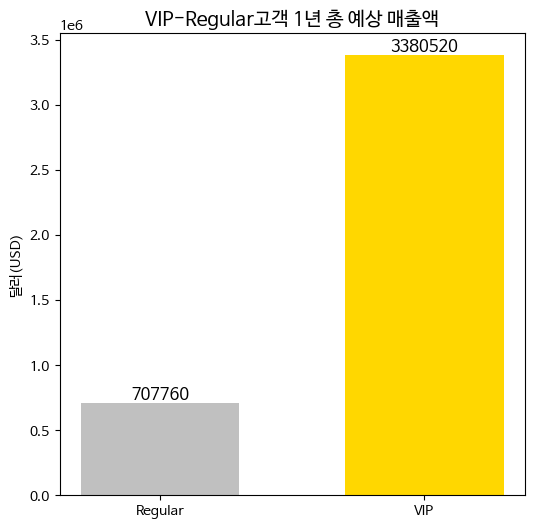

In [ ]:
# VIP-Regular고객 1년 예상 매출액 그래프

plt.figure(figsize=(6,6))
bar= plt.bar(df_revenue.index, df_revenue, width=0.6, color=['silver', 'gold'])

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height , ha='center', va='bottom', size = 12)

plt.title('VIP-Regular고객 1년 총 예상 매출액', fontsize=14)
plt.xlabel('')
plt.ylabel('달러(USD)')

plt.xticks()
plt.show()

In [ ]:
# VIP-Regular고객 예상매출 비율 확인

df_revenue_prop = df.groupby('customer_type2')['projected_revenue'].sum()/df['projected_revenue'].sum()*100
df_revenue_prop

customer_type2
Regular    17.311926
VIP        82.688074
Name: projected_revenue, dtype: float64

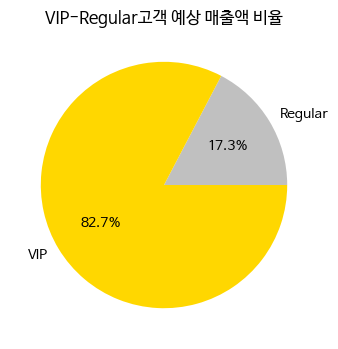

In [ ]:
# VIP-Regular고객 예상매출액 비율 그래프

plt.figure(figsize=(6,4))
plt.pie(df_revenue_prop, labels = df_revenue_prop.index, autopct = '%.1f%%', colors=['silver', 'gold'])

plt.title('VIP-Regular고객 예상 매출액 비율')
plt.show()

In [ ]:
# VIP-Regular고객 1명당 예상 매출액(1년 기준)
df_revenue_per_member = df.groupby('customer_type2')['projected_revenue'].mean()
df_revenue_per_member

customer_type2
Regular     311.514085
VIP        2076.486486
Name: projected_revenue, dtype: float64

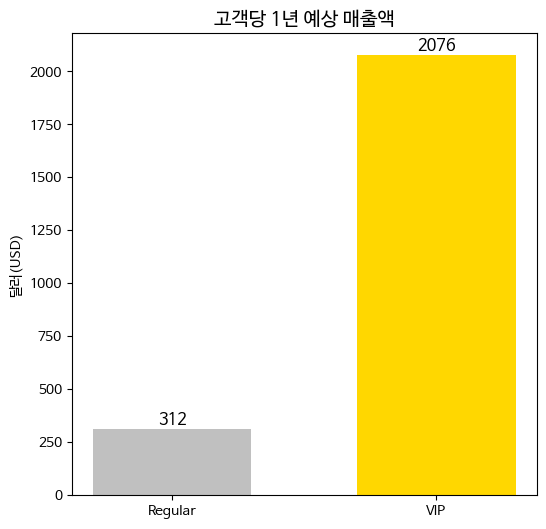

In [ ]:
# VIP-Regular고객 1명당 예상 매출액(1년 기준) 그래프

plt.figure(figsize=(6,6))
bar= plt.bar(df_revenue_per_member.index, df_revenue_per_member, width=0.6, color=['silver', 'gold'])

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height , ha='center', va='bottom', size = 12)

plt.title('고객당 1년 예상 매출액', fontsize=14)
plt.xlabel('')
plt.ylabel('달러(USD)')

plt.xticks()
plt.show()

In [ ]:
# VIP-Regular 고객 비율 확인
df_by_type2_prop = df.groupby('customer_type2')['Customer ID'].count()/df['Customer ID'].count()*100
df_by_type2_prop

customer_type2
Regular    58.25641
VIP        41.74359
Name: Customer ID, dtype: float64

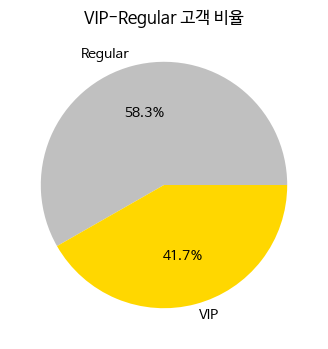

In [ ]:
#VIP-Regular고객 비율 그래프

plt.figure(figsize=(6,4))
plt.pie(df_by_type2_prop, labels = df_by_type2_prop.index, autopct = '%.1f%%', colors=['silver', 'gold'])

plt.title('VIP-Regular 고객 비율')
plt.show()

In [ ]:
# VIP-Regular 고객 수 확인
df_by_type2 = df.groupby('customer_type2')['Customer ID'].count()
df_by_type2

customer_type2
Regular    2272
VIP        1628
Name: Customer ID, dtype: int64

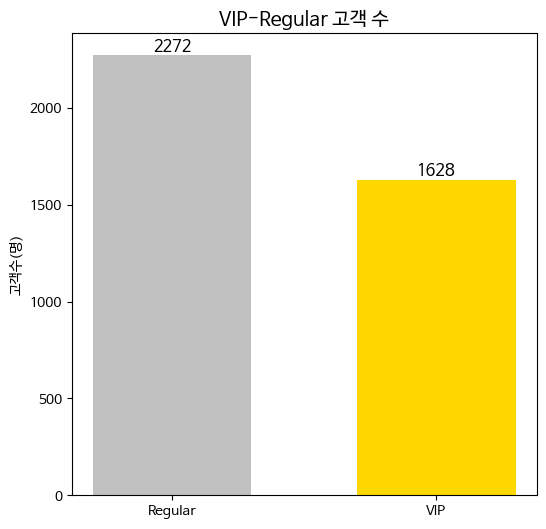

In [ ]:
# VIP-Regular 고객 수 그래프

plt.figure(figsize=(6,6))
bar= plt.bar(df_by_type2.index, df_by_type2, width=0.6, color=['silver', 'gold'])

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height , ha='center', va='bottom', size = 12)

plt.title('VIP-Regular 고객 수', fontsize=14)
plt.xlabel('')
plt.ylabel('고객수(명)')

plt.xticks()
plt.show()

In [ ]:
# VIP가 매출의 많은 부분을 차지하고 있으므로 VIP대상으로 프로모션을 진행하는 것이 타당해 보인다.
# VIP의 연령대와 아이템 추출하자

In [ ]:
# VIP 데이터만 추출
# 이미 만들어 놓은 df가 있음 : df_by_VIP = df[df['customer_type2']=='VIP']
df_by_VIP.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Previous Purchases,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases,purchases_times_per_annual,Age2,customer_type2
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,14,Venmo,Fortnightly,0,1,1,4,26,50,VIP
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,2,Cash,Fortnightly,0,1,1,4,26,10,VIP
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,23,Credit Card,Weekly,0,1,1,5,52,50,VIP
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,49,PayPal,Weekly,0,1,1,5,52,20,VIP
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,...,14,Venmo,Weekly,0,1,1,5,52,40,VIP


In [ ]:
# VIP고객 연령대 확인
df_by_VIP_age2 = df_by_VIP.groupby('Age2')['Customer ID'].count().sort_index()
df_by_VIP_age2

Age2
10     64
20    312
30    295
40    313
50    333
60    286
70     25
Name: Customer ID, dtype: int64

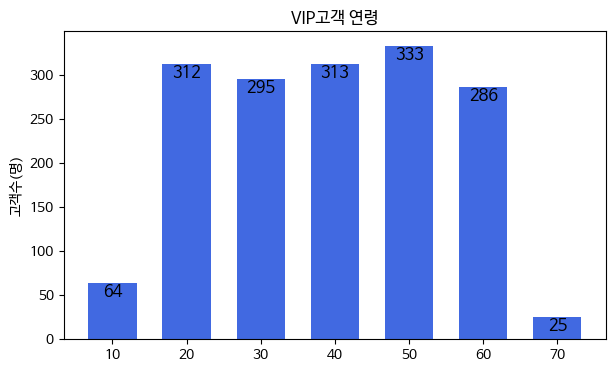

In [ ]:
# VIP고객 연령대 그래프
plt.figure(figsize=(7,4))
bar = plt.bar(df_by_VIP_age2.index, df_by_VIP_age2, width=6.5, color='royalblue')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height , ha='center', va='top', size = 12)

plt.title('VIP고객 연령')
plt.xlabel('')
plt.ylabel('고객수(명)')

plt.xticks(rotation=0)
plt.show()

In [ ]:
# 봄시즌 남성 VIP 데이터만 추출

df_by_spring_VIP_men = df[(df['Season']=='Spring') & (df['customer_type2']=='VIP') & (df['Gender']=='Male')]
df_by_spring_VIP_men.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases,purchases_times_per_annual,Age2,customer_type2,projected_revenue
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Credit Card,Weekly,0,1,1,5,52,50,VIP,3120
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,PayPal,Weekly,0,1,1,5,52,20,VIP,3120
13,14,65,Male,Dress,Clothing,51,New Hampshire,M,Violet,Spring,...,PayPal,Weekly,0,1,1,5,52,60,VIP,3120
16,17,25,Male,Sunglasses,Accessories,36,Alabama,S,Gray,Spring,...,Debit Card,Bi-Weekly,0,1,1,4,26,20,VIP,1560
49,50,68,Male,Hoodie,Clothing,30,New Jersey,S,Indigo,Spring,...,Debit Card,Bi-Weekly,0,1,1,4,26,60,VIP,1560


In [ ]:
# 봄시즌 남성 VIP고객 구입 아이템 확인
df_by_spring_VIP_men_item = df_by_spring_VIP_men.groupby('Item Purchased')['Customer ID'].count().sort_values(ascending=False).head(8)
df_by_spring_VIP_men_item

Item Purchased
Sweater     16
Shorts      16
Gloves      16
Backpack    14
Belt        14
Sneakers    14
Skirt       14
T-shirt     14
Name: Customer ID, dtype: int64

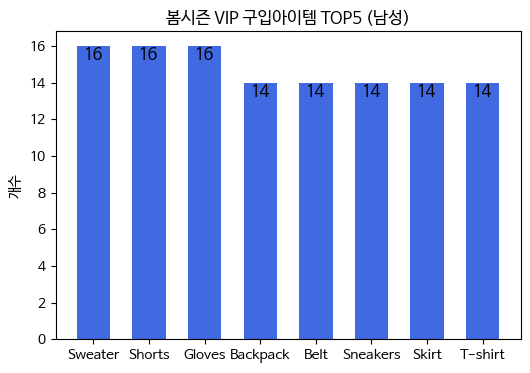

In [ ]:
# 봄시즌 남성 VIP 구입 아이템 수 그래프

plt.figure(figsize=(6,4))
bar = plt.bar(df_by_spring_VIP_men_item.index, df_by_spring_VIP_men_item, width=0.6, color='royalblue')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height , ha='center', va='top', size = 12)

plt.title('봄시즌 VIP 구입아이템 TOP5 (남성)')
plt.xlabel('')
plt.ylabel('개수')

plt.xticks(rotation=0)
plt.show()

In [ ]:
# 봄시즌 여성 VIP고객  데이터만 추출
df_by_spring_VIP_women = df[(df['Season']=='Spring') & (df['customer_type2']=='VIP') & (df['Gender']=='Female')]
df_by_spring_VIP_women.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Payment Method,Frequency of Purchases,gender,subscription_status,discount_applied,frequency_of_purchases,purchases_times_per_annual,Age2,customer_type2,projected_revenue
2669,2670,39,Female,Belt,Accessories,28,Illinois,L,Teal,Spring,...,Credit Card,Weekly,1,0,0,5,52,30,VIP,3120
2676,2677,43,Female,Backpack,Accessories,77,Kentucky,M,Maroon,Spring,...,Cash,Fortnightly,1,0,0,4,26,40,VIP,1560
2678,2679,33,Female,Belt,Accessories,91,Montana,M,Magenta,Spring,...,Credit Card,Bi-Weekly,1,0,0,4,26,30,VIP,1560
2704,2705,52,Female,Dress,Clothing,54,Tennessee,L,Beige,Spring,...,Debit Card,Weekly,1,0,0,5,52,50,VIP,3120
2705,2706,65,Female,Jacket,Outerwear,81,Washington,S,Turquoise,Spring,...,Credit Card,Bi-Weekly,1,0,0,4,26,60,VIP,1560


In [ ]:
# 봄시즌 여성 VIP고객 구입 아이템 확인
df_by_spring_VIP_women_item = df_by_spring_VIP_women.groupby('Item Purchased')['Customer ID'].count().sort_values(ascending=False).head(6)
df_by_spring_VIP_women_item

Item Purchased
Boots      11
Skirt       8
Blouse      8
Coat        8
Sweater     8
Handbag     8
Name: Customer ID, dtype: int64

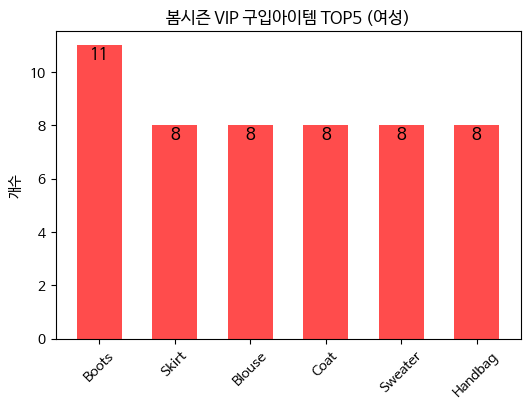

In [ ]:
# 봄시즌 여성 VIP고객 구입 아이템 수 그래프

plt.figure(figsize=(6,4))
bar = plt.bar(df_by_spring_VIP_women_item.index, df_by_spring_VIP_women_item, width=0.6, color='red', alpha=0.7)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.0f' % height , ha='center', va='top', size = 12)

plt.title('봄시즌 VIP 구입아이템 TOP5 (여성)')
plt.xlabel('')
plt.ylabel('개수')

plt.xticks(rotation=45)
plt.show()